In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
from wordcloud import WordCloud #워드 클라우드
import matplotlib.pyplot as plt

df = pd.read_csv("output_iphoneCategory.csv")

#review
text=''
review=[]
for each_line in df['review']:
    review.append(each_line)
    
review[1]

'기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로 바로 주문, 결제했습니다! 자급제는 처음이라 설레는 긴장으로 기다렸던 기억이 새록새록하네요!!휴\n기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로 바로 주문, 결제했습니다! 자급제는 처음이라 설레는 긴장으로 기다렸던 기억이 새록새록하네요!!\n\n휴일과 주말 포함 25일 결제, 30일 수령했습니다. 받고 보니 무엇보다 네이버페이로 다른 자급제보다 혜택이 큰 거 같아요:)\n\n🤳🏻사용감\n6s에서 넘어왔는데 모든 게 다 새롭긴 하지만 확실히 램이 늘어나서 빠릿빠릿한게 짜릿합니다... 아이폰 쓰신 분들은 아시겠지만 창 넘길 때 부드러운 거 못 잃는데 속도도 빠르고\n\n🤳🏻컬러\n처음부터 퍼시픽블루가 원픽이었는데 고민 끝에 라스트픽도 퍼블입니다🧜🏻\u200d♀️ 받는 빛의 양에 따라서 블루 빛이 달라보인다는 후기가 기억나네요! 빛의 양에 따라\n\n🤳🏻사진\n사실 제일 기대했던 부분인데 역시는 역시👏🏻\n조명이나 해를 마주하고 찍으면 고스트 현상은 여전히 있더라구요! 첨부한 사진 참고하시면 같은 자리에서 확대 정도만 다르게 해서 찍었습니다! 어두운 데서도 잘 나오는게 굉장히 🥰'

In [3]:
#불용어 제거
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text   

review_=[]
for i in review:
    a=clean_str(i)
    review_.append(a)  #불용어제거한 review 저장
    
review_[1]

'기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로 바로 주문 결제했습니다 자급제는 처음이라 설레는 긴장으로 기다렸던 기억이 새록새록하네요휴\n기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로 바로 주문 결제했습니다 자급제는 처음이라 설레는 긴장으로 기다렸던 기억이 새록새록하네요\n\n휴일과 주말 포함 25일 결제 30일 수령했습니다 받고 보니 무엇보다 네이버페이로 다른 자급제보다 혜택이 큰 거 같아요\n\n사용감\n6s에서 넘어왔는데 모든 게 다 새롭긴 하지만 확실히 램이 늘어나서 빠릿빠릿한게 짜릿합니다 아이폰 쓰신 분들은 아시겠지만 창 넘길 때 부드러운 거 못 잃는데 속도도 빠르고\n\n컬러\n처음부터 퍼시픽블루가 원픽이었는데 고민 끝에 라스트픽도 퍼블입니다 받는 빛의 양에 따라서 블루 빛이 달라보인다는 후기가 기억나네요 빛의 양에 따라\n\n사진\n사실 제일 기대했던 부분인데 역시는 역시\n조명이나 해를 마주하고 찍으면 고스트 현상은 여전히 있더라구요 첨부한 사진 참고하시면 같은 자리에서 확대 정도만 다르게 해서 찍었습니다 어두운 데서도 잘 나오는게 굉장히 '

In [4]:
import tweepy
# !pip install tweepy==3.10.0
# !pip install konlpy
from konlpy.tag import Okt
t = Okt()

a= len(review_) #불용어 제거한 리뷰
token_review_list=[]
for i in range(0,a): # 리뷰하나당 처리하기위해 for문 
    token_review=t.morphs(review_[i])  #t=형태소분석기. morphs=형태소 추출.review_=전처리한 리뷰.
    #token_review_str=(' '.join(token_review))  #,로 나누어져있는 형태소를 하나의 str로 묶기(df에 넣기위해서)
    #df['token_reivew'] = token_review_str  #이렇게하면 열전체값이 통일됨
    token_review_list.append(token_review) #하나의 리스트를 만들어서 df에 추가해야함.
df['token_review']=token_review_list #형태소단위로 나누어진 리뷰저장
df

,Unnamed: 0,type,category,review,star,token_review
0,0,아이폰12프로,만족도,아이폰을 사고 배송받은 뒤 며칠 사용해본 후에 리뷰 작성하고 싶어서 이제서야 후기를...,5,"[아이폰, 을, 사고, 배송, 받은, 뒤, 며칠, 사용, 해본, 후, 에, 리뷰, ..."
1,1,아이폰12프로,만족도,기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로...,5,"[기변, 예약, 을, 하고, 대, 기, 타, 다가, 우연히, 크리스마스, 날, 밤,..."
2,2,아이폰12프로,만족도,아이폰 프로 12 실버 구매자 입니다^^기다리고 기다리던 제품을 빠르게 받아 볼 수...,5,"[아이폰, 프로, 12, 실버, 구매, 자, 입니다, 기다리고, 기다리던, 제품, ..."
3,3,아이폰12프로,만족도,그래파이트 들어오기를 오래 기다렸는데 배송도 주문한 바로 다음날 오고 무엇보다 너어...,5,"[그래, 파이트, 들어오기를, 오래, 기다렸는데, 배송, 도, 주문, 한, 바로, ..."
4,4,아이폰12프로,만족도,1. 배송 : 주말빼고 2일만에 왔어요 저번주 금요일 저녁에 주문했는데 화요일 오전...,5,"[1, 배송, 주말, 빼고, 2일, 만에, 왔어요, 저번, 주, 금요일, 저녁, 에..."
...,...,...,...,...,...,...
719,719,아이폰12프로,제품상태,제품 하자 없고 배송도 빠릅니다!\n제품 하자 없고 배송도 빠릅니다!,5,"[제품, 하자, 없고, 배송, 도, 빠릅니다, \n, 제품, 하자, 없고, 배송, ..."
720,720,아이폰12프로,제품상태,2차사전예약이었는데 오늘수령했\n2차사전예약이었는데 오늘수령했습니다.(토요일)\n폰...,5,"[2, 차, 사전예약, 이었는데, 오늘, 수령, 했, \n, 2, 차, 사전예약, ..."
721,721,아이폰12프로,제품상태,좋아여!!! 하자 없습니당!\n좋아여!!! 하자 없습니당!,5,"[좋아여, 하자, 없, 습, 니당, \n, 좋아여, 하자, 없, 습, 니당]"
722,722,아이폰12프로,배터리,그래파이트랑 고민하다가 실버샀는데 존녜에여진짜ㅠㅠ 전에7쓰던거에 비하면 많이 무겁긴...,5,"[그래, 파이트, 랑, 고민, 하다가, 실버, 샀는데, 존녜, 에여, 진짜, 전, ..."


In [5]:
df.to_csv('iphone_category_token.csv', encoding='utf-8-sig', mode='w')

In [6]:
#별점 기준으로 정렬
df_sorted_by_star= df.sort_values(by='star' ,ascending=False)
len(df_sorted_by_star)

724

In [7]:
df_sorted_by_star # 별점5점부터 1점까지

,Unnamed: 0,type,category,review,star,token_review
0,0,아이폰12프로,만족도,아이폰을 사고 배송받은 뒤 며칠 사용해본 후에 리뷰 작성하고 싶어서 이제서야 후기를...,5,"[아이폰, 을, 사고, 배송, 받은, 뒤, 며칠, 사용, 해본, 후, 에, 리뷰, ..."
478,478,아이폰12프로,만족도,명불허전 아이폰 개간지폰 ㅎㅎㅎ\n명불허전 아이폰 개간지폰 ㅎㅎㅎ,5,"[명불허전, 아이폰, 개간, 지, 폰, 명불허전, 아이폰, 개간, 지, 폰]"
470,470,아이폰12프로,만족도,현대카드로 18만원 가까이 할인받\n현대카드로 18만원 가까이 할인받고 잘 샀습니다...,5,"[현, 대, 카드, 로, 18만원, 가까이, 할인, 받, \n, 현, 대, 카드, ..."
471,471,아이폰12프로,만족도,1차예약분으로 샀어요. 출시 당일\n1차예약분으로 샀어요. 출시 당일 바로 배송됐네...,5,"[1, 차, 예약, 분, 으로, 샀어요, 출시, 당일, \n, 1, 차, 예약, 분..."
472,472,아이폰12프로,만족도,배송도 빠르고 카드할인도 너무\n배송도 빠르고 카드할인도 너무 좋았습니다\n내년 아...,5,"[배송, 도, 빠르고, 카드, 할인, 도, 너무, \n, 배송, 도, 빠르고, 카드..."
...,...,...,...,...,...,...
484,484,아이폰12프로,가격,실버가 실물이 너무너무 예쁘고 마지막 재고였을 때 구매해서 많이 안기다리고 좋았어요...,2,"[실버, 가, 실물, 이, 너무, 너무, 예쁘고, 마지막, 재고였을, 때, 구매, ..."
55,55,아이폰12프로,만족도,실버가 실물이 너무너무 예쁘고 마지막 재고였을 때 구매해서 많이 안기다리고 좋았어요...,2,"[실버, 가, 실물, 이, 너무, 너무, 예쁘고, 마지막, 재고였을, 때, 구매, ..."
504,504,아이폰12프로,가격,실버가 실물이 너무너무 예쁘고 마지막 재고였을 때 구매해서 많이 안기다리고 좋았어요...,2,"[실버, 가, 실물, 이, 너무, 너무, 예쁘고, 마지막, 재고였을, 때, 구매, ..."
723,723,아이폰12프로,와이파이,실버가 실물이 너무너무 예쁘고 마지막 재고였을 때 구매해서 많이 안기다리고 좋았어요...,2,"[실버, 가, 실물, 이, 너무, 너무, 예쁘고, 마지막, 재고였을, 때, 구매, ..."


In [8]:
adf=df_sorted_by_star.groupby('star').count()
adf

,Unnamed: 0,type,category,review,token_review
star,,,,,
1,1,1,1,1,1
2,4,4,4,4,4
3,11,11,11,11,11
4,50,50,50,50,50
5,658,658,658,658,658


In [9]:
# 5점 기준으로 분석
five_review=[]
five_token_review=[]
for i in range(0,724):
    if(df['star'][i]==5):
        five_review.append(df['review'][i])  # 5점리뷰모음. len=3191
        five_token_review.append(df['token_review'][i]) 
        
len(five_token_review)

658

In [10]:
# 단어 빈도수 계산
frequency = {}

for token_review in five_token_review:
    for word in token_review:
        count = frequency.get(word,0)
        frequency[word] = count + 1

# 많이 나온 단어 순으로 정렬
sort=sorted(frequency.items(), key=lambda x: x[1], reverse=True)
sort

[('\n', 1064),
 ('도', 615),
 ('에', 565),
 ('이', 529),
 ('배송', 528),
 ('너무', 394),
 ('가', 313),
 ('잘', 309),
 ('아이폰', 287),
 ('구매', 260),
 ('은', 242),
 ('는', 216),
 ('을', 195),
 ('하고', 193),
 ('로', 193),
 ('실버', 180),
 ('최고', 175),
 ('사용', 170),
 ('했는데', 168),
 ('색상', 165),
 ('에서', 164),
 ('폰', 160),
 ('으로', 157),
 ('주문', 156),
 ('좋아요', 154),
 ('12', 149),
 ('해서', 142),
 ('것', 141),
 ('한', 141),
 ('제', 134),
 ('빠르고', 131),
 ('다', 126),
 ('예요', 123),
 ('프로', 117),
 ('정말', 114),
 ('골드', 113),
 ('넘', 112),
 ('할인', 112),
 ('입니다', 106),
 ('만', 106),
 ('더', 101),
 ('고민', 100),
 ('제품', 99),
 ('그래', 99),
 ('많이', 98),
 ('자급', 97),
 ('파이트', 97),
 ('서', 95),
 ('보다', 94),
 ('를', 87),
 ('블루', 87),
 ('요', 87),
 ('재고', 86),
 ('했어요', 86),
 ('같아요', 86),
 ('네이버', 85),
 ('예뻐요', 84),
 ('빨리', 84),
 ('디자인', 83),
 ('역시', 83),
 ('만에', 81),
 ('만족합니다', 80),
 ('저렴하게', 79),
 ('처음', 78),
 ('저', 75),
 ('기', 75),
 ('좋습니다', 75),
 ('빠른', 75),
 ('바로', 74),
 ('생각', 73),
 ('애플', 73),
 ('진짜', 73),
 ('\n\n', 72),
 ('고', 72)

<class 'numpy.ndarray'>
(800, 800, 3)


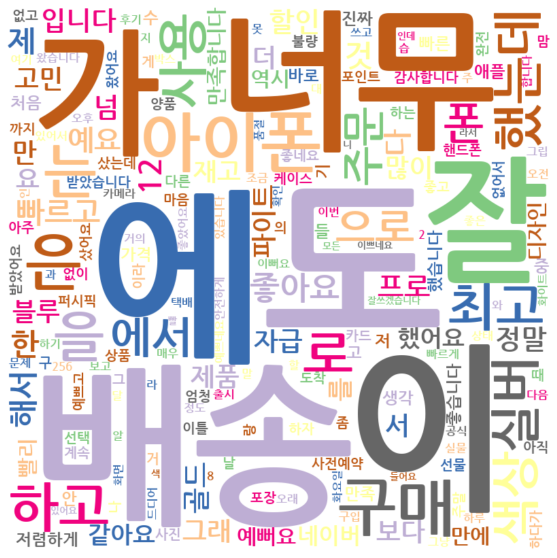

In [12]:
# 많이 나온 단어로 워드클라우드 생성
wc = WordCloud(font_path = 'C:\\windows\\Fonts\\NanumGothicBold.ttf',# 글씨체
               background_color='white',# 배경색
               colormap = 'Accent_r',
               width = 800,
               height = 800)

wordcloud_words = wc.generate_from_frequencies(frequency) # 앞서 분석한 단어 빈도수로 워드클라우드 생성
array = wc.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10)) # 워드클라우드 그리기
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()